In [2]:
import pandas as pd

We will be using a dataset from data.world provided by CrowdFlower which has tweets about Google and Apple from a conference. The tweet labels were crowdsources and reflect the emotion they convey and what product/service/company the emotion is directed at based on the content.

Contributors evaluated tweets about multiple brands and products. The crowd was asked if the tweet expressed positive, negative, or no emotion towards a brand and/or product. If some emotion was expressed they were also asked to say which brand or product was the target of that emotion

# DATA LOADING

In [3]:
file_path = r'../data/judge-1377884607_tweet_product_company.csv'

df = pd.read_csv(file_path, encoding='latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Since the column names are too long and difficult to read, we can rename them to ease readability and interpretability.

In [4]:
df.columns = ['Tweet', 'Product/Brand', 'Emotion']
df.head()

,Tweet,Product/Brand,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


We can take a look at the unique values in the Brand/Product and Emotion columns to see what we have

In [5]:
df['Emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [6]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

We can see that there is a lot of information on different products and services (mainly Apple products and services, Google, Android, Androis Apps, and NaN) and an 'I can't tell emotion'.

# DATA CLEANING

## Addressing Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


We are missing the body of text for 1 tweet and 5802 tags for the product/company that the tweet was about. Let's start by looking at the missing tweet.

In [8]:
df[df['Tweet'].isna()]

,Tweet,Product/Brand,Emotion
6,NaN,NaN,No emotion toward brand or product


All the information from this row is missing, including the tweet itself, so we can drop it. 

In [9]:
df = df.drop([6])
df[df['Tweet'].isna()]


,Tweet,Product/Brand,Emotion


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


Now let's look at the missing values in the product/company column

In [11]:
df[df['Product/Brand'].isna()].head(10)

,Tweet,Product/Brand,Emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
34,Anyone at #SXSW who bought the new iPad want ...,NaN,No emotion toward brand or product
35,At #sxsw. Oooh. RT @mention Google to Launch ...,NaN,No emotion toward brand or product
37,SPIN Play - a new concept in music discovery f...,NaN,No emotion toward brand or product
39,VatorNews - Google And Apple Force Print Media...,NaN,No emotion toward brand or product
41,HootSuite - HootSuite Mobile for #SXSW ~ Updat...,NaN,No emotion toward brand or product
42,Hey #SXSW - How long do you think it takes us ...,NaN,No emotion toward brand or product


The tweets are not directed towards a specific product or brand or a generally talking about the SXSW event or something related to the event with no specific feeling.

In [12]:
print("Value Counts of emotion of entire dataset \n")
display(df['Emotion'].value_counts())
print("\n\n Value Counts of emotion of dataset with no product attached")
display(df[df['Product/Brand'].isna()]['Emotion'].value_counts())

Value Counts of emotion of entire dataset 



No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64



 Value Counts of emotion of dataset with no product attached


No emotion toward brand or product    5297
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: Emotion, dtype: int64

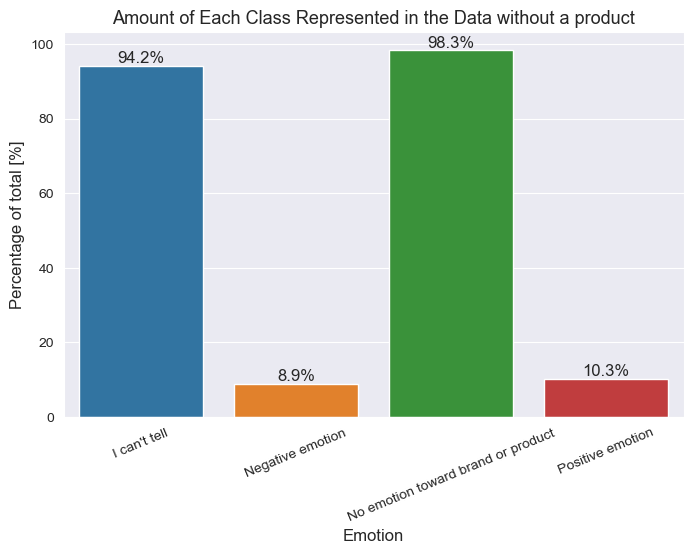

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

full_counts = df['Emotion'].value_counts()
subbed_counts = df[df['Product/Brand'].isna()]['Emotion'].value_counts()

#Displaying percentage of values for each class that come from subbed set
percentage_counts = subbed_counts/full_counts

plt.figure(figsize=(8,5))
sns.set_style('darkgrid')
bp = sns.barplot(x=list(percentage_counts.keys()), y= percentage_counts*100)

bp.set_ylabel('Percentage of total [%]', fontsize=12)
bp.set_xlabel('Emotion', fontsize=12)
bp.set_xticklabels(labels=list(percentage_counts.keys()), rotation=22.5)
bp.set_title("Amount of Each Class Represented in the Data without a product", fontsize=13)

for patch in bp.patches:
    x = patch.get_bbox().get_points()[:,0]
    y = patch.get_bbox().get_points()[1,1]
    bp.annotate("{:.1f}%".format(y), (x.mean(), y),\
            ha= 'center', va= 'bottom', fontsize= 'large') 

plt.show()

This shows that when no product is discerned, it is more likely that there is no emotion directed towards a product or one cannot tell what the emotion is. We can fill the null values with "Unknown" as a placeholder for the time being. The data missing in product/brand name has some value and information in the fact that it is missing. Most of the tweets that have no emotion are in this category and they will be left as unknown.

In [14]:
df['Product/Brand'].fillna('Unknown', inplace = True)

In [15]:
# Verifying that the null values have been handled
df.isna().sum()

Tweet            0
Product/Brand    0
Emotion          0
dtype: int64

## Cleaning the Emotion Column

In [16]:
df['Emotion'].value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: Emotion, dtype: int64

Similar to the initial column names, the values in the emotion column can be cleaned uo for interpretability and to reduce the time required to type the code

In [17]:
emotion_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 'No emotion toward brand or product': 'Neutral', "I can't tell": 'Unknown'}
df['Emotion'] = df['Emotion'].map(emotion_dict)
df.head()

,Tweet,Product/Brand,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [18]:
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Unknown      156
Name: Emotion, dtype: int64

Now let's look at the tweets with 'Unknown' emotion values to see if we notice any patterns or can easily tell whether the tweet has a negative, positive, or neutral emotion.

In [19]:
pd.set_option("display.max_colwidth", 300)
df[df['Emotion']=='Unknown']

,Tweet,Product/Brand,Emotion
90,Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh,Unknown,Unknown
102,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,Unknown,Unknown
237,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Unknown
341,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,Unknown,Unknown
368,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},Unknown,Unknown
...,...,...,...
9020,It's funny watching a room full of people hold their iPad in the air to take a photo. Like a room full of tablets staring you down. #SXSW,Unknown,Unknown
9032,"@mention yeah, we have @mention , Google has nothing on us :) #SXSW",Unknown,Unknown
9037,"@mention Yes, the Google presentation was not exactly what I was expecting. #sxsw",Unknown,Unknown
9058,&quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?,Unknown,Unknown


These tweets are difficult to classify without more context. Some of them could be taken as genuine or sarcastic depending on the context.

Since we need labels for our models, the tweets will not be usefulfor model development. Luckily, they make up a small percentage of our data so we can drop these rows. 

In [20]:
df = df[df['Emotion']!='Unknown']
df['Emotion'].value_counts()

Neutral     5388
Positive    2978
Negative     570
Name: Emotion, dtype: int64

## Dealing with Duplicates

In [21]:
len(df[df.duplicated()])

22

There are 22 tweets in the dataset that are duplicated. Let's take a closer look at them

In [22]:
df[df.duplicated()]

,Tweet,Product/Brand,Emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive
776,"Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Neutral
2232,Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,Unknown,Neutral
2559,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive
3950,Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW,Android App,Positive
3962,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive
4897,"Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!",iPad or iPhone App,Positive
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter,Unknown,Neutral
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, not fuss! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter",Unknown,Neutral
5881,"RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Neutral


In [23]:
df.drop_duplicates(keep='first', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          8914 non-null   object
 1   Product/Brand  8914 non-null   object
 2   Emotion        8914 non-null   object
dtypes: object(3)
memory usage: 278.6+ KB


We can now perform EDA on the data

# EDA

With the objectives in mind, we need to isolate and analyze positive and negative tweets as a whole and on a company and product basis. We will start with positive tweets.

## Tweets with Positive Sentiment

In [24]:
# creating a new df for the positive tweets
df_positive = df[df['Emotion']=='Positive']
# Verifying that the negative and neutral tweets have been removed
df_positive['Emotion'].value_counts()

Positive    2970
Name: Emotion, dtype: int64

In [25]:
# Parsing the tweets into a list
corpus_pos = df_positive['Tweet'].to_list()
corpus_pos[0:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

### Tokenizing

We will use TweetTokenizer throughout this project since it has a built-in functionality like processing hashtags and handles correctly unlike other tokenizers. We will drop all handles from the tweets since we are focused on the content of the tweet.

In [26]:
from nltk import TweetTokenizer
import string

# function for the tokenization of the tweets
def tokenize_tweets(corpus, preserve_case = False, strip_handles = True):
    """Function returns tokens based on a corpus passed in. The corpus will be broken
    doen into tokens based on TweetTokenizer from the nltk package.
    -----------------------
    Arguments:
    corpus: the collection of words to be tokenized in a corpus format.
    preserve_case: whether to keep the upper case letters in the words as upper case.
    strip_handles: whether to remove Twitter handles"""

    tokenizer = TweetTokenizer(preserve_case= preserve_case,
                               strip_handles= strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens

In [27]:
# Tokenize positive tweets
tokens_pos = tokenize_tweets(corpus_pos)

In [28]:
# Displaying the 10 most frequent tokens
from nltk import FreqDist
freq_pos = FreqDist(tokens_pos)
freq_pos.most_common(10)

[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1214),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019)]

The tokens contain a lot of punctuation and stop words like "at" and "the" because we have not removed these yet. Before removing them, we will be lemmatizing the tokens to ensure that we are capturing any stop words that could be generated using this process.

### Lemmatization

In [29]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')

# function for the lemmatization of tokens
def lemmatize_tokens(tokens_list):
    """Function lemmatizes tokens list that is passed in using WordNetLemmatizer
    and returns lemmatized tokens.
    --------------------
    Arguments:
    tokens_list: a tokens list"""
    lemmatizer = WordNetLemmatizer()
    tokens_lemm = [lemmatizer.lemmatize(word) for word in tokens_list]
    return tokens_lemm

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rosew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Lemmatizing positive tweets tokens
tokens_pos_lemm = lemmatize_tokens(tokens_pos)

In [31]:
# displaying the 10 most common tokens
freq_pos_lemmatized = FreqDist(tokens_pos_lemm)
freq_pos_lemmatized.most_common(10)

[(',', 4050),
 ('#sxsw', 2983),
 ('.', 2230),
 ('the', 1590),
 ('!', 1241),
 ('link', 1218),
 ('{', 1210),
 ('}', 1210),
 ('to', 1154),
 ('at', 1019)]

We still have punctuation and stop words in our list as we have not removed them yet. We can now remove them after lemmatizing our tokens since they do not reveal anything about the sentiment of the tweets. We will see more relevant information and allow for bettwe performance of our models.

### Stop Word and Punctuation Removal

In [32]:
# Getting stop words from NLTK
from nltk.corpus import stopwords
stop_list = stopwords.words('english')
stop_list += list(string.punctuation)

# Adding additional characters and empty strings to stop words
additional_punctuation = ['“','”','...',"''",'’','``','']
stop_list += additional_punctuation

In [33]:
# Function for the removal of stop words
def remove_stop_words(tokens, stop_list = stop_list):
    """Function removes stop words from a given tokens list 
    based on a stop word list
    ----------------------
    Arguments: 
    tokens: a tokens list
    stop_list: a list containing stop words to be removed from tokens"""

    # encoding or decoding tojens to remove unrecognized symbols and 
    # eliminate external links
    tokens_stopped = [word.encode('ascii', 'ignore').decode()
                      for word in tokens
                      if (word not in stop_list) &
                      (word.startswith('http')== False)]
    return tokens_stopped

In [34]:
# Removing stop words from lemmatized tokens
tokens_pos_list = remove_stop_words(tokens_pos_lemm)

In [35]:
# 50 most common tokens
freq_stop_words_removed = FreqDist(tokens_pos_list)
freq_stop_words_removed.most_common(50)

[('#sxsw', 2983),
 ('link', 1218),
 ('ipad', 1010),
 ('rt', 931),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('', 443),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('sxsw', 144),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('#sxswi', 96),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88)]

It is clear that we still have some words that do not have valuable information surrounding the sentiment of the tweets. We know that SXSW refers to the conference and can remove all words surrounding this. Also, words like link and rt could be referring to retweets and external lunks. However, since link could have its literal meaning, we will build a function that takes a random sample of the tweets to see whether rt and link appear there and assess their usage.

In [36]:
# Adding sxsw to the stop word list
stop_list += ['#sxsw', '#sxswi', 'sxsw']

In [37]:
# defining a function that will provide context for given words

import numpy as np
def context_finder(word, corpus, n_samples =5, n_count = 5):
    """This function takes n_samples with each sample having n_count tweets
    from the given corpus, and displays the tweets that have the specified
    word in them. The goal of the function us to get some context about a word.
    --------------------------
    Arguments:
    word: a word that the function will be providing context for 
    corpus: a document that the word is contained in
    n_samples: how many samples will be collected
    n_count: how many tweets each sample will contain """

    i = 0
    for _ in list(range(0,n_samples)):
        sample = np.random.choice(corpus, n_count)
        for tweet in sample:
            if word in tweet:
                print(tweet)
                i+=1
    print('------------------------')
    print(f'Out of {n_count*n_samples} tweets analyzed, \
          {i} tweets had the word "{word}" in them.')

In [38]:
#verifying that 'link' is used in reference to external web links
context_finder('link', corpus_pos)

No way. Is Apple really manhandling #sxsw like that? RT @mention Smartphone breakdown at #sxsw (unofficÛ_ (cont) {link}
RT @mention Our #sxsw app is now on #android :D huge props to @mention @mention @mention &amp; @mobileroadie Get it now: {link}
Thanks for the free drinks Google!  #sxsw (@mention Speakeasy w/ 47 others) {link}
Sweet! The convore iPhone app is ready for #sxsw : {link}
RT @mention At #sxsw even the cabbies are tech savvy. That's his iPhone streaming twitter. @mention  {link}
#sxsw Google party in Austin Texas, on entry received anti privacy law petition, sunglasses and free beer. {link}
RT @mention Need a Workspace?  Book it from your #iPhone {link} @mention #app #SXSW #virtualoffice
Ipad's day in the geekest place in the world right now..yes u have a queue: Apple just opens a hidden store {link} #SXSW
Getting ready for #sxsw by installing @mention on my iPhone. Woot! {link}
It looks like a laptop, but it's a dock for the Motorola Atrix, an Android phone from #ATT. It

It is clear that the word link mainly refers to web links that were removed when the data was being input int the dataset. This does not give valuable insight into what the tweet is about, and we will add the word to our stop words list

In [39]:
stop_list += ["link"]

let's look at RT

In [40]:
context_finder('RT', corpus_pos)

RT @mention Awesome new version of @mention for iPhone and new web site coming after #sxsw. Want a demo? Meet with @mention at #sxsw. Pls RT
RT @mention Imagine if every company had the 20% concept like Google. #bavcID #SXSW
RT @mention An awesome FREE iPhone app for keeping track of friends and meeting up and finding people for #SXSW {link}
Someone's buying herself a present ;-) RT @mention Apple Is Opening A Pop-Up Store In Austin For #SXSW {link}
RT @mention Sweet, Apple's opening a pop-up shop in the Scarbrough Building on Congress for the iPad 2 - {link} /via @mention #sxsw
------------------------
Out of 25 tweets analyzed,           5 tweets had the word "RT" in them.


This also needs to be added to our tokenizer list since it denotes a retweet.

In [41]:
stop_list += ['rt']

In [42]:
# Let's now update our tokens list
tokens_pos_list = remove_stop_words(tokens_pos_list, stop_list=stop_list)

### The 50 Most Frequent Words in Positive Tweets

In [43]:
final_50_most_freq_pos = FreqDist(tokens_pos_list)
final_50_most_freq_pos.most_common(50)

[('ipad', 1010),
 ('apple', 711),
 ('google', 602),
 ('2', 595),
 ('store', 554),
 ('iphone', 466),
 ('app', 387),
 ('new', 358),
 ('austin', 250),
 ('get', 181),
 ('#apple', 174),
 ('launch', 173),
 ('android', 161),
 ('party', 151),
 ('pop-up', 151),
 ('line', 143),
 ('time', 136),
 ('great', 135),
 ('via', 132),
 ('#ipad2', 129),
 ('day', 124),
 ('social', 122),
 ('free', 120),
 ('cool', 119),
 ("i'm", 115),
 ('like', 115),
 ('map', 115),
 ('one', 114),
 ('win', 112),
 ('today', 111),
 ('ha', 108),
 ('circle', 107),
 ('w', 104),
 ('go', 104),
 ('come', 103),
 ('wa', 100),
 ('awesome', 93),
 ('#ipad', 93),
 ('love', 93),
 ('good', 92),
 ('network', 91),
 ('mobile', 90),
 ('temporary', 89),
 ('downtown', 88),
 ('opening', 88),
 ('people', 82),
 ('open', 82),
 ('#iphone', 82),
 ('got', 81),
 ('apps', 78)]

We can see that the most common words include "apple" and "google", but there are other words like "launch", "store", and "pop-up" show more about what the people were excited about. However, we can use a word cloud to show all these words. 

### Wordcloud with Product/Brand Information for Positive Tweets

In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#defining a function for wordcloud generation
def generate_wordcloud(tokens, collocations=False, background_color='black', 
                       colormap='Greens', display=True):
    
    """Function generates and returns a wordcloud based on a tokens list passed in.
    -------------------------------
    Arguments:
    tokens: a tokens list
    collocations: Whether to include collocations (bigrams) of two words
    background_color: background color of the resulting word cloud
    colormap: the color map for the words that will be in the word cloud
    display: Whether to show the resulting wordcloud"""
    
    ## Initalize a WordCloud
    wordcloud = WordCloud(collocations=collocations, 
                          background_color=background_color, 
                          colormap=colormap, 
                          width=500, height=300)

    ## Generate wordcloud from tokens
    wordcloud.generate(','.join(tokens))

    ## Plot with matplotlib
    if display:
        plt.figure(figsize = (12, 15), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis('off');
    return wordcloud

We will start by generating a word cloud for the tokens we were looking at above

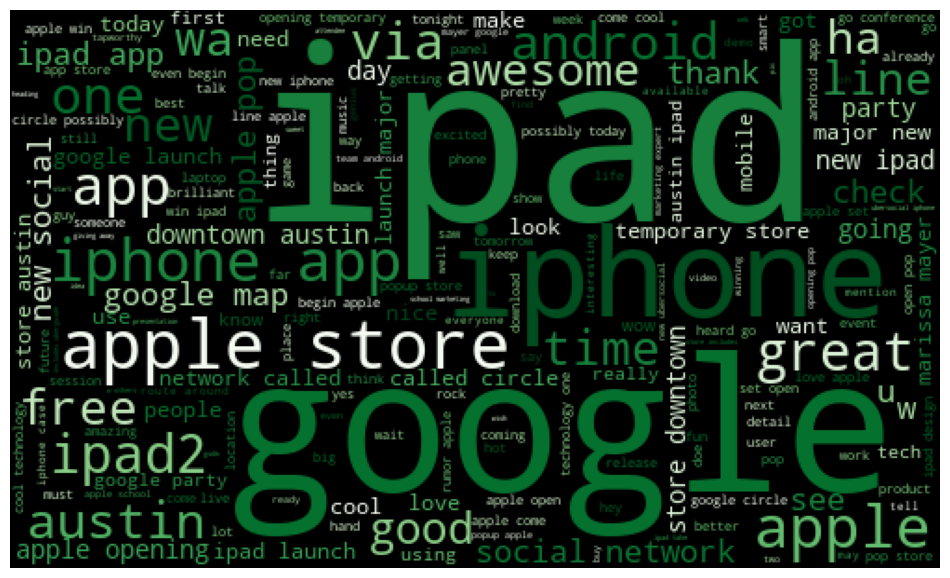

In [46]:
# Generating the word cloud
cloud_positive_all = generate_wordcloud(tokens_pos_list, collocations=True)

This shows us what the public was tweeting about in a positive way. We see that a lot of people are excited about the iPad, iPhone, and iPad 2 launch. It is also clear that people are tweeting about Apple and Google. To find additional common words through the word cloud that are not related to Apple , Google, iPhone, iPad 2, android, and others, we can remove them and visualize.

In [47]:
#removing product/company names
stop_lst_no_comp = stop_list + ['iphone', 'ipad', 'iphone app', 'google', 'android', 'apple',
                               '#apple', '#google', '#ipad', '#iphone']

tokens_pos_list = remove_stop_words(tokens_pos_list, stop_list=stop_lst_no_comp)

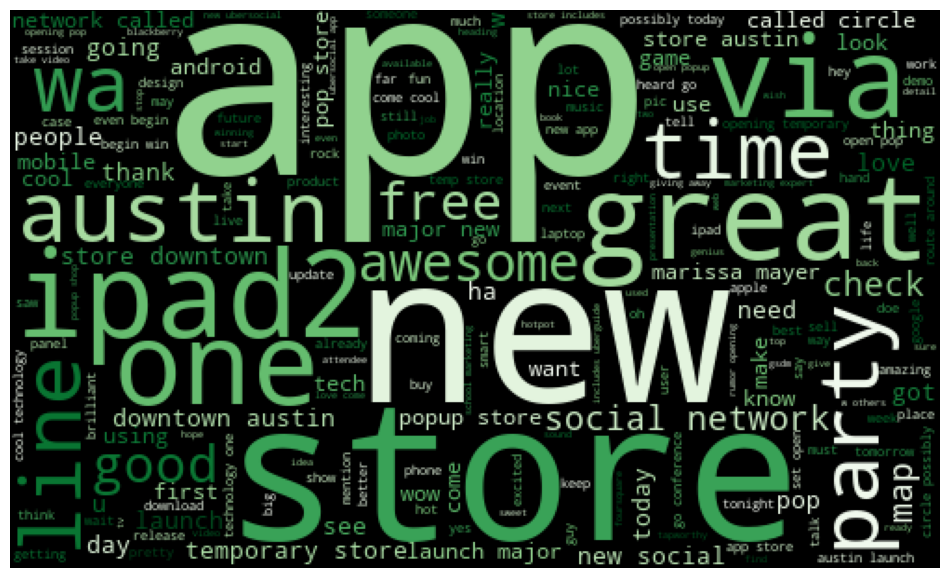

In [48]:
cloud_positive_without_company = generate_wordcloud(tokens_pos_list, collocations=True)

### N-grams of Positive Reviews

### Positive Bigrams and Trigrams

In [49]:
from nltk.collocations import *
bigrams_measures = nltk.collocations.BigramAssocMeasures()
trigrams_measures = nltk.collocations.TrigramAssocMeasures()

In [50]:
# initializing finders
finder_bi_pos = BigramCollocationFinder.from_words(tokens_pos_list)
finder_tri_pos = TrigramCollocationFinder.from_words(tokens_pos_list)

In [51]:
# Getting frequency information from finder
bigrams = finder_bi_pos.score_ngrams(bigrams_measures.raw_freq)
trigrams = finder_tri_pos.score_ngrams(trigrams_measures.raw_freq)

In [52]:
bigrams[:30]

[(('pop-up', 'store'), 0.004340211680499505),
 (('social', 'network'), 0.0032741947765171707),
 (('temporary', 'store'), 0.00304576258280667),
 (('new', 'social'), 0.00293154648595142),
 (('store', 'downtown'), 0.0026650422599558366),
 (('downtown', 'austin'), 0.002626970227670753),
 (('2', 'launch'), 0.002208177872534836),
 (('called', 'circle'), 0.0021701058402497525),
 (('network', 'called'), 0.0021701058402497525),
 (('marissa', 'mayer'), 0.0021320338079646693),
 (('launch', 'major'), 0.002055889743394502),
 (('major', 'new'), 0.002055889743394502),
 (('popup', 'store'), 0.002055889743394502),
 (('store', 'austin'), 0.0019036016142541688),
 (('pop', 'store'), 0.0017513134851138354),
 (('austin', '2'), 0.0016370973882585853),
 (('opening', 'temporary'), 0.0016370973882585853),
 (('possibly', 'today'), 0.0015609533236884184),
 (('circle', 'possibly'), 0.001522881291403335),
 (('even', 'begin'), 0.001522881291403335),
 (('cool', 'technology'), 0.0012944490976928348),
 (('ever', 'heard

In [53]:
trigrams[:30]

[(('new', 'social', 'network'), 0.00281733038909617),
 (('store', 'downtown', 'austin'), 0.002398538033960253),
 (('social', 'network', 'called'), 0.0021701058402497525),
 (('network', 'called', 'circle'), 0.0021320338079646693),
 (('launch', 'major', 'new'), 0.002055889743394502),
 (('major', 'new', 'social'), 0.002055889743394502),
 (('opening', 'temporary', 'store'), 0.0015609533236884184),
 (('circle', 'possibly', 'today'), 0.001522881291403335),
 (('called', 'circle', 'possibly'), 0.0014848092591182517),
 (('temporary', 'store', 'downtown'), 0.0014467372268331684),
 (('austin', '2', 'launch'), 0.0013325211299779183),
 (("one's", 'ever', 'heard'), 0.0012944490976928348),
 (('downtown', 'austin', '2'), 0.0012563770654077514),
 (('cool', 'technology', "one's"), 0.001218305033122668),
 (('even', 'begin', 'win'), 0.001218305033122668),
 (('technology', "one's", 'ever'), 0.001218305033122668),
 (('ever', 'heard', 'go'), 0.0011802330008375847),
 (('come', 'cool', 'technology'), 0.0011040

We can see that a lot of people are excited about a new temporary popup store downtown in Austin, the iPad 2's launch, the new social network called Circle, and Google's Marissa Mayer. 
We now have an initial understanding of positive tweets and can look at the negative ones.

## Tweets with Negative Sentiment

In [54]:
# Creating a new dataframe for negative Tweets
df_negative = df[df['Emotion']=='Negative']
df_negative['Emotion'].value_counts()

Negative    569
Name: Emotion, dtype: int64

In [55]:
# Creating a list for them
corpus_neg = df_negative['Tweet']. to_list()
corpus_neg[0:5]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now\x89ÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw']

### Tokenization, Lemmatization, and Removing Stop Words 

In [56]:
# tokenize tweets
tokens_negative = tokenize_tweets(corpus_neg)
# Lemmatize tweets
tokens_neg_lem = lemmatize_tokens(tokens_negative)
# Remove stop words and punctuation
tokens_neg_list = remove_stop_words(tokens_neg_lem, stop_list= stop_list)

### 50 Most Frequent Words in the Negative Tweets

In [57]:
final_50_most_freq_neg = FreqDist(tokens_neg_list)
final_50_most_freq_neg.most_common(50)

[('ipad', 179),
 ('iphone', 145),
 ('google', 136),
 ('apple', 100),
 ('2', 81),
 ('', 69),
 ('app', 60),
 ('store', 47),
 ('new', 43),
 ('like', 43),
 ('need', 35),
 ('ha', 31),
 ('circle', 29),
 ('design', 29),
 ('people', 29),
 ('social', 28),
 ('apps', 26),
 ('get', 25),
 ('wa', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 23),
 ('launch', 22),
 ('one', 22),
 ('day', 21),
 ('today', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('android', 19),
 ('#ipad', 19),
 ('would', 19),
 ('network', 18),
 ('phone', 18),
 ('headache', 17),
 ('news', 17),
 ('go', 17),
 ('long', 17),
 ('product', 17),
 ("i've", 16),
 ("i'm", 16),
 ('battery', 16),
 ('user', 15),
 ('thing', 15),
 ('#apple', 15),
 ('good', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15)]

Apple, Google, iphone, ipad are common among the negative tweets. We can visualize this with a word cloud

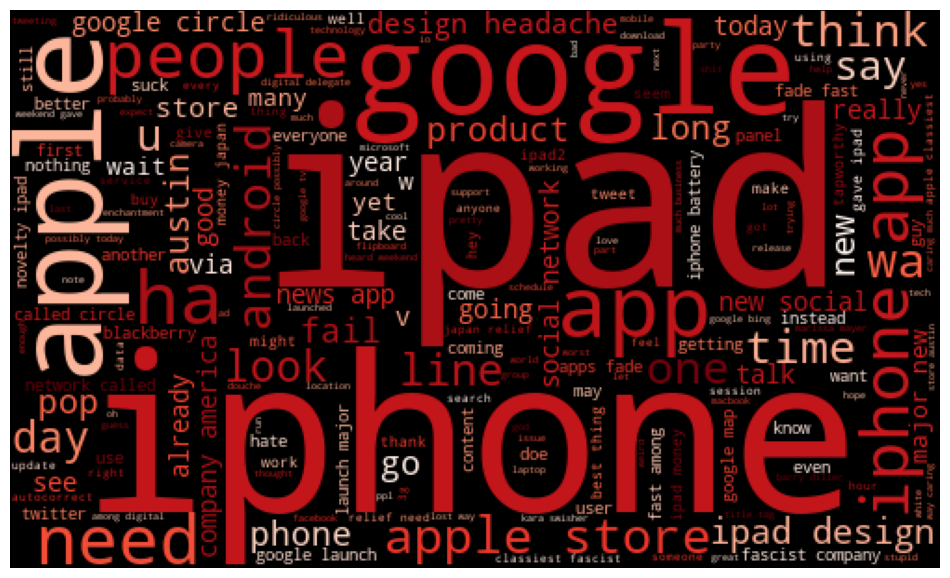

In [58]:
#generating word cloud for negative tweets
cloud_neg_with_company = generate_wordcloud(tokens_neg_list, colormap='Reds', 
                                         collocations=True)

Once again, we will remove the company names to get additional information

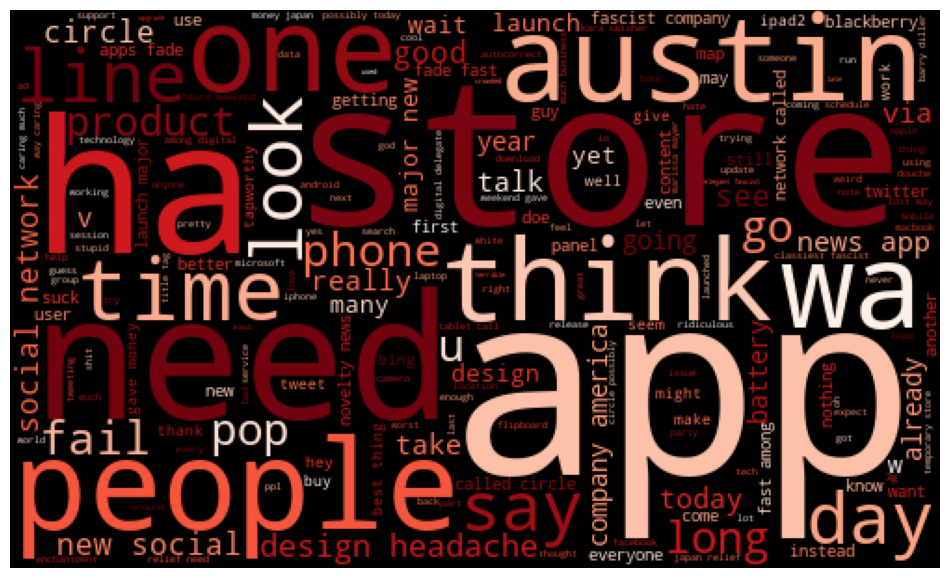

In [60]:
# Removing company/product information from the tokens
tokens_neg_list = remove_stop_words(tokens_neg_list, stop_list= stop_lst_no_comp)
# Generating the word cloud
cloud_neg_without_company = generate_wordcloud(tokens_neg_list, colormap='Reds', collocations=True)

Most negative tweets were talking about stores, apps, austin, think, fail, and pop.

### N-grams of Negative Reviews

### Negative Bigrams and Trigrams

In [61]:
from nltk.collocations import *
bigrams_measures = nltk.collocations.BigramAssocMeasures()
trigrams_measures = nltk.collocations.TrigramAssocMeasures()

In [62]:
# initializing finders
finder_bi_neg = BigramCollocationFinder.from_words(tokens_neg_list)
finder_tri_neg = TrigramCollocationFinder.from_words(tokens_neg_list)

In [64]:
# Getting frequency information from finder
bigrams_neg_all = finder_bi_neg.score_ngrams(bigrams_measures.raw_freq)
trigrams_neg_all = finder_tri_neg.score_ngrams(trigrams_measures.raw_freq)

In [65]:
bigrams_neg_all[:30]

[(('design', 'headache'), 0.003249235474006116),
 (('new', 'social'), 0.0030581039755351682),
 (('social', 'network'), 0.0028669724770642203),
 (('company', 'america'), 0.002484709480122324),
 (('fascist', 'company'), 0.0022935779816513763),
 (('major', 'new'), 0.0022935779816513763),
 (('network', 'called'), 0.002102446483180428),
 (('called', 'circle'), 0.00191131498470948),
 (('launch', 'major'), 0.00191131498470948),
 (('fade', 'fast'), 0.0017201834862385322),
 (('fast', 'among'), 0.0017201834862385322),
 (('news', 'apps'), 0.0017201834862385322),
 (('novelty', 'news'), 0.0017201834862385322),
 (('#japan', 'relief'), 0.0015290519877675841),
 (('2', 'money'), 0.0015290519877675841),
 (('best', 'thing'), 0.0015290519877675841),
 (('classiest', 'fascist'), 0.0015290519877675841),
 (('gave', '2'), 0.0015290519877675841),
 (("i've", 'heard'), 0.0015290519877675841),
 (('need', '2'), 0.0015290519877675841),
 (('relief', 'need'), 0.0015290519877675841),
 (('thing', "i've"), 0.001529051987

In [67]:
trigrams_neg_all[:30]

[(('new', 'social', 'network'), 0.002484709480122324),
 (('major', 'new', 'social'), 0.0022935779816513763),
 (('fascist', 'company', 'america'), 0.002102446483180428),
 (('social', 'network', 'called'), 0.002102446483180428),
 (('launch', 'major', 'new'), 0.00191131498470948),
 (('network', 'called', 'circle'), 0.00191131498470948),
 (('fade', 'fast', 'among'), 0.0017201834862385322),
 (('#japan', 'relief', 'need'), 0.0015290519877675841),
 (('best', 'thing', "i've"), 0.0015290519877675841),
 (('classiest', 'fascist', 'company'), 0.0015290519877675841),
 (('gave', '2', 'money'), 0.0015290519877675841),
 (('relief', 'need', '2'), 0.0015290519877675841),
 (('thing', "i've", 'heard'), 0.0015290519877675841),
 (('2', 'money', '#japan'), 0.001337920489296636),
 (('among', 'digital', 'delegate'), 0.001337920489296636),
 (('fast', 'among', 'digital'), 0.001337920489296636),
 (('money', '#japan', 'relief'), 0.001337920489296636),
 (('apps', 'fade', 'fast'), 0.0011467889908256881),
 (('called'

The new social network circle is mentioned a lot in the negative Tweets, with other comments surrounding a company being referred to a "fascist", probably Google or Apple.

## Tweets Related to Products/Brands

To analyze tweets related specifically to Google and Apple, we will engineer the company column by mapping the different values to either Google, Apple, or other brand. 

In [68]:
df['Product/Brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

These will be converted to three categories: Apple, Google, and Unknown. 

In [69]:
product_replacement_dict = {'iPhone': 'Apple','iPad or iPhone App': 'Apple', 'iPad': 'Apple', 'Google': 'Google', 'Unknown': 'Unknown','Android': 'Google', 'Apple': 'Apple',
                             'Android App': 'Google','Other Google product or service': 'Google','Other Apple product or service': 'Apple' }
df['Brand'] = df['Product/Brand'].map(product_replacement_dict)
df.head()

,Tweet,Product/Brand,Emotion,Brand
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative,Apple
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative,Apple
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive,Google


In [70]:
df['Brand'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [71]:
for brand in df['Brand'].unique():
    print("----Value Counts for {}----".format(brand))
    display(df[df['Brand'] == brand]['Emotion'].value_counts())
    display(df[df['Brand'] == brand]['Emotion'].value_counts(normalize=True))
    print("\n")

----Value Counts for Apple----


Positive    1945
Negative     387
Neutral       65
Name: Emotion, dtype: int64

Positive    0.811431
Negative    0.161452
Neutral     0.027117
Name: Emotion, dtype: float64



----Value Counts for Google----


Positive    719
Negative    131
Neutral      26
Name: Emotion, dtype: int64

Positive    0.820776
Negative    0.149543
Neutral     0.029680
Name: Emotion, dtype: float64



----Value Counts for Unknown----


Neutral     5284
Positive     306
Negative      51
Name: Emotion, dtype: int64

Neutral     0.936713
Positive    0.054246
Negative    0.009041
Name: Emotion, dtype: float64

For both brands, positive reviews are more than negative ones

Now that we have only three categories, let's start with Apple

### Tweets Related To Apple

In [72]:
df_apple = df[df["Brand"]== 'Apple']
corpus_for_apple = df_apple['Tweet'].to_list()

In [73]:
# tokenize tweets
tokens_apple = tokenize_tweets(corpus_for_apple)
# Lemmatize tweets
tokens_lem_apple = lemmatize_tokens(tokens_apple)
# Remove stop words and punctuation
tokens_apple_list = remove_stop_words(tokens_lem_apple, stop_list= stop_list)

### A WordCloud with Product Information

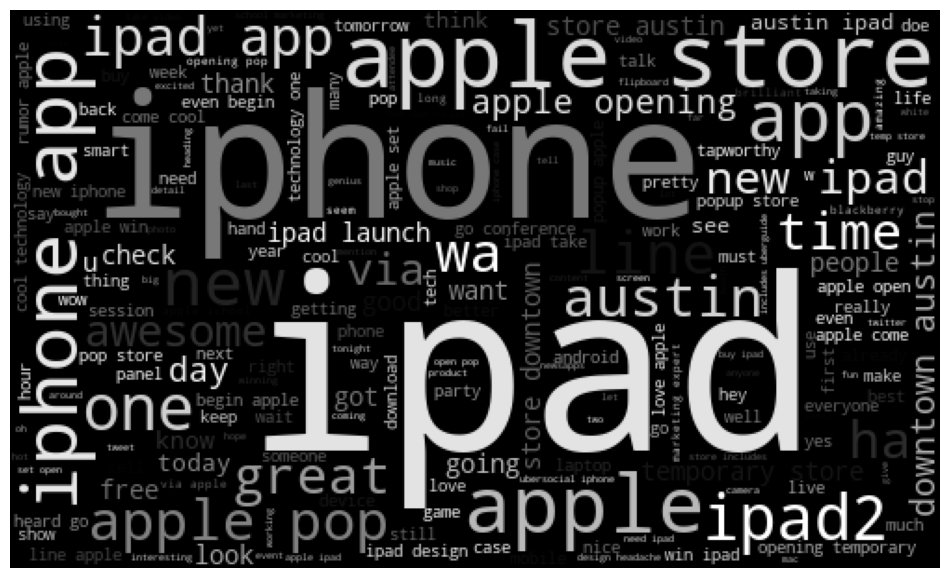

In [92]:
generate_wordcloud(tokens_apple_list, colormap="Greys", collocations=True);

### Word Cloud without Product information

We will add some other stop words to apple's list like the ipad 2 and Austin.

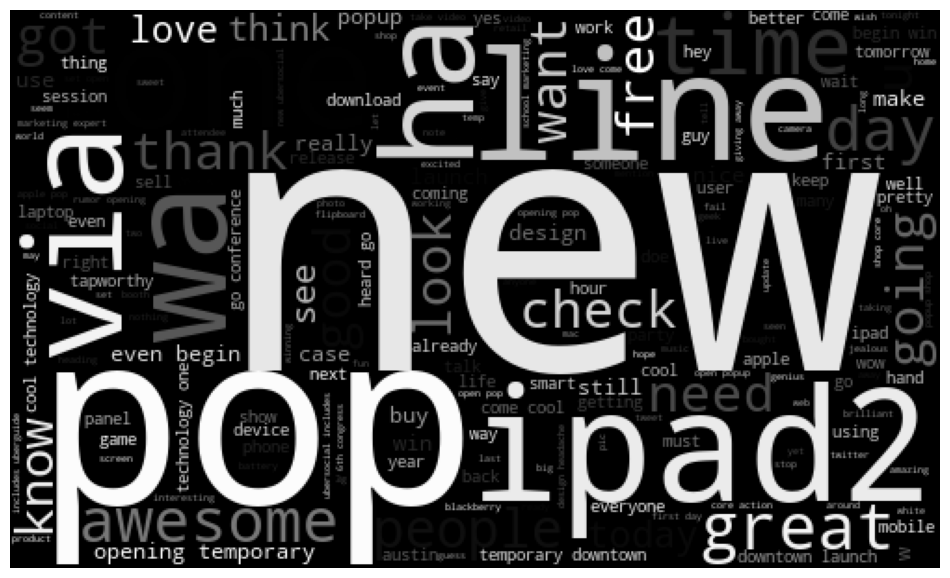

In [98]:
apple_stop_words_no_comp = stop_lst_no_comp + ['ipad 2','store', 'app', 'austin','apps']
# ['iphone', 'ipad', 'iphone app', 'google', 'android', 'apple',
#                                '#apple', '#google', '#ipad', '#iphone']
tokens_apple_list = remove_stop_words(tokens_apple_list, stop_list=apple_stop_words_no_comp)
generate_wordcloud(tokens_apple_list, colormap='Greys', collocations=True);

### Percentage of Positive, Neutral, and Negative Sentiment

Visualizing the percentage of tweets that had positive, negative, or neutral sentiments is a good way of gauging the overall sentiment towards the company.

In [74]:
df_apple_sentiments = pd.DataFrame(df_apple['Emotion'].value_counts(normalize=True)).reset_index()
df_apple_sentiments.columns = ['Emotion', 'Percentage']
display(df_apple_sentiments)
df_apple_sentiments.sort_values('Percentage', ascending=True, inplace=True)


,Emotion,Percentage
0,Positive,0.811431
1,Negative,0.161452
2,Neutral,0.027117


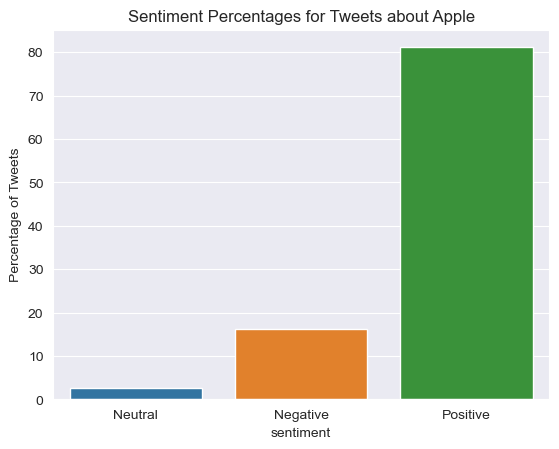

In [87]:
# fig, ax = plt.subplots()
# ax.barh(df_apple_sentiments['Emotion'], df_apple_sentiments['Percentage'], 
#         color=['Black', 'Red', 'Green'])
# ax.set_xlim(0, 1.1)
# ax.set_xlabel('Percentage of Tweets')
# ax.set_ylabel('Sentiment')
# ax.set_title('Sentiment Percentages for Tweets about Apple');

fig, ax = plt.subplots()
# plt.figure(figsize=(10,8))
ax = sns.barplot(x = df_apple_sentiments['Emotion'], y =df_apple_sentiments['Percentage']*100)
ax.set_xlabel('sentiment')
ax.set_ylabel('Percentage of Tweets')
ax.set_title('Sentiment Percentages for Tweets about Apple');
